In [ ]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
# ALL STATS COME FROM BASKETBALL-REFERENCE. ALL CREDIT GOES TO BASKETBALL-REFERENCE FOR MAKING THIS DATA PUBLIC 

In [ ]:
## *********
## For this first part of the project, I will be evaluating the top 10 players of the 2019-2020 NBA REGULAR SEASON
## based on the criteria of a purely statistical argument. This means things like team success may not 
## outwardly play a role in selecting these players, but may come in to play when talking about minutes played
## and usage percentage. 

## Again, no biases will be present in this statistical argument. This means that *AGE WILL NOT PLAY A FACTOR. in the top 10* 
## Just because LeBron James is keeping up with the young guns at his old age, he will not be 'rewarded' for his 
## play because of his age. 

## For the second part of this project, I am looking to run some regression models to find predictors of a teams
## success. I will make some models and evaluate them to determine whether or not they are accurare or "Useful". 
## I want to do an analysis on team data and figure out if we can predict team success. 
## I will come to a conclusion on whether or not I can find a model to determine this. I am excited to find 
## answers, or to find that the NBA is really unpredictable!
## *********

In [ ]:
# NBA season we will be analyzing
year = 2020
# URL page we will scraping 
url = "https://www.basketball-reference.com/leagues/NBA_2020_per_game.html#per_game_stats::none".format(year)
url2 = "https://www.basketball-reference.com/leagues/NBA_2020_advanced.html".format(year)
# this is the HTML from the given URL
html = urlopen(url)
html2 = urlopen(url2)
soup = BeautifulSoup(html)
soup2 = BeautifulSoup(html2)

In [ ]:
# use findALL() to get the column headers
soup.findAll('tr', limit=2)
soup2.findAll('tr', limit=2)
# use getText()to extract the text we need into a list
headers = [th.getText() for th in soup.findAll('tr', limit=2)[0].findAll('th')]
headers2 = [th.getText() for th in soup2.findAll('tr', limit=2)[0].findAll('th')]
# exclude the first column as we will not need the ranking order from Basketball Reference for the analysis
headers = headers[1:]
headers2 = headers2[1:]
headers2

['Player',
 'Pos',
 'Age',
 'Tm',
 'G',
 'MP',
 'PER',
 'TS%',
 '3PAr',
 'FTr',
 'ORB%',
 'DRB%',
 'TRB%',
 'AST%',
 'STL%',
 'BLK%',
 'TOV%',
 'USG%',
 '\xa0',
 'OWS',
 'DWS',
 'WS',
 'WS/48',
 '\xa0',
 'OBPM',
 'DBPM',
 'BPM',
 'VORP']

In [ ]:
# avoid the first header row
rows = soup.findAll('tr')[1:]
rows2 = soup2.findAll('tr')[1:]
player_stats = [[td.getText() for td in rows[i].findAll('td')]
            for i in range(len(rows))]
player_stats2 = [[td.getText() for td in rows2[i].findAll('td')]
            for i in range(len(rows2))]

In [ ]:
stats2020 = pd.DataFrame(player_stats, columns = headers)
advstats2020 = pd.DataFrame(player_stats2, columns = headers2)
stats2020.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Steven Adams,C,26,OKC,63,63,26.7,4.5,7.6,.592,0.0,0.0,.333,4.5,7.5,.594,.593,1.9,3.2,.582,3.3,6.0,9.3,2.3,0.8,1.1,1.5,1.9,10.9
1,Bam Adebayo,PF,22,MIA,72,72,33.6,6.1,11.0,.557,0.0,0.2,.143,6.1,10.8,.564,.558,3.7,5.3,.691,2.4,7.8,10.2,5.1,1.1,1.3,2.8,2.5,15.9
2,LaMarcus Aldridge,C,34,SAS,53,53,33.1,7.4,15.0,.493,1.2,3.0,.389,6.2,12.0,.519,.532,3.0,3.6,.827,1.9,5.5,7.4,2.4,0.7,1.6,1.4,2.4,18.9
3,Kyle Alexander,C,23,MIA,2,0,6.5,0.5,1.0,.500,0.0,0.0,,0.5,1.0,.500,.500,0.0,0.0,,1.0,0.5,1.5,0.0,0.0,0.0,0.5,0.5,1.0
4,Nickeil Alexander-Walker,SG,21,NOP,47,1,12.6,2.1,5.7,.368,1.0,2.8,.346,1.1,2.8,.391,.455,0.5,0.8,.676,0.2,1.6,1.8,1.9,0.4,0.2,1.1,1.2,5.7


In [ ]:
stats2020.set_index("Player", inplace=True)
stats2020.head(10)
advstats2020.set_index("Player", inplace=True)
advstats2020.head(10)

,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,,OWS,DWS,WS,WS/48,,OBPM,DBPM,BPM,VORP
Player,,,,,,,,,,,,,,,,,,,,,,,,,,,
Steven Adams,C,26,OKC,63,1680,20.5,.604,.006,.421,14.0,24.0,19.2,13.2,1.5,3.4,14.2,17.3,,3.8,2.7,6.5,.185,,1.9,1.1,2.9,2.1
Bam Adebayo,PF,22,MIA,72,2417,20.3,.598,.018,.484,8.5,24.9,17.0,24.2,1.7,3.8,17.6,21.2,,4.6,3.9,8.5,.168,,1.4,2.0,3.4,3.3
LaMarcus Aldridge,C,34,SAS,53,1754,19.7,.571,.198,.241,6.3,17.8,12.0,11.4,1.0,4.4,7.8,23.4,,3.0,1.4,4.5,.122,,1.8,-0.5,1.4,1.5
Kyle Alexander,C,23,MIA,2,13,4.7,.500,.000,.000,17.9,8.3,12.9,0.0,0.0,0.0,33.3,10.2,,0.0,0.0,0.0,-0.003,,-6.1,-3.5,-9.6,0.0
Nickeil Alexander-Walker,SG,21,NOP,47,591,8.9,.473,.500,.139,1.6,13.5,7.5,21.1,1.3,1.1,16.1,23.3,,-0.7,0.4,-0.2,-0.020,,-3.2,-1.4,-4.6,-0.4
Grayson Allen,SG,24,MEM,38,718,12.0,.609,.562,.179,1.2,11.1,6.2,10.0,0.7,0.2,10.9,17.6,,0.8,0.4,1.2,.082,,-0.1,-1.2,-1.3,0.1
Jarrett Allen,C,21,BRK,70,1852,20.7,.664,.013,.581,12.3,24.9,18.7,8.9,1.0,4.2,11.7,14.9,,5.2,2.9,8.2,.212,,1.4,1.0,2.3,2.0
Kadeem Allen,PG,27,NYK,10,117,14.0,.512,.364,.250,1.8,6.6,4.1,27.0,2.1,1.6,14.1,20.6,,0.1,0.1,0.1,.053,,-0.1,-0.6,-0.7,0.0
Al-Farouq Aminu,PF,29,ORL,18,380,7.6,.395,.419,.337,6.6,18.4,12.3,7.4,2.3,1.9,14.7,13.2,,-0.4,0.5,0.1,.014,,-4.4,1.4,-3.0,-0.1


In [ ]:
fullstats2020 = pd.concat([stats2020, advstats2020], axis=1, sort=False)
fullstats2020.head(15)

,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,,OWS,DWS,WS,WS/48,,OBPM,DBPM,BPM,VORP
Player,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Steven Adams,C,26,OKC,63,63,26.7,4.5,7.6,.592,0.0,0.0,.333,4.5,7.5,.594,.593,1.9,3.2,.582,3.3,6.0,9.3,2.3,0.8,1.1,1.5,1.9,10.9,C,26,OKC,63,1680,20.5,.604,.006,.421,14.0,24.0,19.2,13.2,1.5,3.4,14.2,17.3,,3.8,2.7,6.5,.185,,1.9,1.1,2.9,2.1
Bam Adebayo,PF,22,MIA,72,72,33.6,6.1,11.0,.557,0.0,0.2,.143,6.1,10.8,.564,.558,3.7,5.3,.691,2.4,7.8,10.2,5.1,1.1,1.3,2.8,2.5,15.9,PF,22,MIA,72,2417,20.3,.598,.018,.484,8.5,24.9,17.0,24.2,1.7,3.8,17.6,21.2,,4.6,3.9,8.5,.168,,1.4,2.0,3.4,3.3
LaMarcus Aldridge,C,34,SAS,53,53,33.1,7.4,15.0,.493,1.2,3.0,.389,6.2,12.0,.519,.532,3.0,3.6,.827,1.9,5.5,7.4,2.4,0.7,1.6,1.4,2.4,18.9,C,34,SAS,53,1754,19.7,.571,.198,.241,6.3,17.8,12.0,11.4,1.0,4.4,7.8,23.4,,3.0,1.4,4.5,.122,,1.8,-0.5,1.4,1.5
Kyle Alexander,C,23,MIA,2,0,6.5,0.5,1.0,.500,0.0,0.0,,0.5,1.0,.500,.500,0.0,0.0,,1.0,0.5,1.5,0.0,0.0,0.0,0.5,0.5,1.0,C,23,MIA,2,13,4.7,.500,.000,.000,17.9,8.3,12.9,0.0,0.0,0.0,33.3,10.2,,0.0,0.0,0.0,-0.003,,-6.1,-3.5,-9.6,0.0
Nickeil Alexander-Walker,SG,21,NOP,47,1,12.6,2.1,5.7,.368,1.0,2.8,.346,1.1,2.8,.391,.455,0.5,0.8,.676,0.2,1.6,1.8,1.9,0.4,0.2,1.1,1.2,5.7,SG,21,NOP,47,591,8.9,.473,.500,.139,1.6,13.5,7.5,21.1,1.3,1.1,16.1,23.3,,-0.7,0.4,-0.2,-0.020,,-3.2,-1.4,-4.6,-0.4
Grayson Allen,SG,24,MEM,38,0,18.9,3.1,6.6,.466,1.5,3.7,.404,1.6,2.9,.545,.580,1.0,1.2,.867,0.2,2.0,2.2,1.4,0.3,0.1,0.9,1.4,8.7,SG,24,MEM,38,718,12.0,.609,.562,.179,1.2,11.1,6.2,10.0,0.7,0.2,10.9,17.6,,0.8,0.4,1.2,.082,,-0.1,-1.2,-1.3,0.1
Jarrett Allen,C,21,BRK,70,64,26.5,4.3,6.6,.649,0.0,0.1,.000,4.3,6.6,.658,.649,2.4,3.9,.633,3.1,6.5,9.6,1.6,0.6,1.3,1.1,2.3,11.1,C,21,BRK,70,1852,20.7,.664,.013,.581,12.3,24.9,18.7,8.9,1.0,4.2,11.7,14.9,,5.2,2.9,8.2,.212,,1.4,1.0,2.3,2.0
Kadeem Allen,PG,27,NYK,10,0,11.7,1.9,4.4,.432,0.5,1.6,.313,1.4,2.8,.500,.489,0.7,1.1,.636,0.2,0.7,0.9,2.1,0.5,0.2,0.8,0.7,5.0,PG,27,NYK,10,117,14.0,.512,.364,.250,1.8,6.6,4.1,27.0,2.1,1.6,14.1,20.6,,0.1,0.1,0.1,.053,,-0.1,-0.6,-0.7,0.0
Al-Farouq Aminu,PF,29,ORL,18,2,21.1,1.4,4.8,.291,0.5,2.0,.250,0.9,2.8,.320,.343,1.1,1.6,.655,1.3,3.5,4.8,1.2,1.0,0.4,0.9,1.5,4.3,PF,29,ORL,18,380,7.6,.395,.419,.337,6.6,18.4,12.3,7.4,2.3,1.9,14.7,13.2,,-0.4,0.5,0.1,.014,,-4.4,1.4,-3.0,-0.1


In [ ]:
fullstats2020

,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,,OWS,DWS,WS,WS/48,,OBPM,DBPM,BPM,VORP
Player,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Steven Adams,C,26,OKC,63,63,26.7,4.5,7.6,.592,0.0,0.0,.333,4.5,7.5,.594,.593,1.9,3.2,.582,3.3,6.0,9.3,2.3,0.8,1.1,1.5,1.9,10.9,C,26,OKC,63,1680,20.5,.604,.006,.421,14.0,24.0,19.2,13.2,1.5,3.4,14.2,17.3,,3.8,2.7,6.5,.185,,1.9,1.1,2.9,2.1
Bam Adebayo,PF,22,MIA,72,72,33.6,6.1,11.0,.557,0.0,0.2,.143,6.1,10.8,.564,.558,3.7,5.3,.691,2.4,7.8,10.2,5.1,1.1,1.3,2.8,2.5,15.9,PF,22,MIA,72,2417,20.3,.598,.018,.484,8.5,24.9,17.0,24.2,1.7,3.8,17.6,21.2,,4.6,3.9,8.5,.168,,1.4,2.0,3.4,3.3
LaMarcus Aldridge,C,34,SAS,53,53,33.1,7.4,15.0,.493,1.2,3.0,.389,6.2,12.0,.519,.532,3.0,3.6,.827,1.9,5.5,7.4,2.4,0.7,1.6,1.4,2.4,18.9,C,34,SAS,53,1754,19.7,.571,.198,.241,6.3,17.8,12.0,11.4,1.0,4.4,7.8,23.4,,3.0,1.4,4.5,.122,,1.8,-0.5,1.4,1.5
Kyle Alexander,C,23,MIA,2,0,6.5,0.5,1.0,.500,0.0,0.0,,0.5,1.0,.500,.500,0.0,0.0,,1.0,0.5,1.5,0.0,0.0,0.0,0.5,0.5,1.0,C,23,MIA,2,13,4.7,.500,.000,.000,17.9,8.3,12.9,0.0,0.0,0.0,33.3,10.2,,0.0,0.0,0.0,-0.003,,-6.1,-3.5,-9.6,0.0
Nickeil Alexander-Walker,SG,21,NOP,47,1,12.6,2.1,5.7,.368,1.0,2.8,.346,1.1,2.8,.391,.455,0.5,0.8,.676,0.2,1.6,1.8,1.9,0.4,0.2,1.1,1.2,5.7,SG,21,NOP,47,591,8.9,.473,.500,.139,1.6,13.5,7.5,21.1,1.3,1.1,16.1,23.3,,-0.7,0.4,-0.2,-0.020,,-3.2,-1.4,-4.6,-0.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Trae Young,PG,21,ATL,60,60,35.3,9.1,20.8,.437,3.4,9.5,.361,5.7,11.4,.501,.519,8.0,9.3,.860,0.5,3.7,4.3,9.3,1.1,0.1,4.8,1.7,29.6,PG,21,ATL,60,2120,23.9,.595,.455,.448,1.6,11.5,6.5,45.6,1.4,0.3,16.2,34.9,,5.3,0.6,5.9,.133,,6.2,-2.3,3.9,3.1
Cody Zeller,C,27,CHO,58,39,23.1,4.3,8.3,.524,0.3,1.3,.240,4.0,7.0,.577,.543,2.1,3.1,.682,2.8,4.3,7.1,1.5,0.7,0.4,1.3,2.4,11.1,C,27,CHO,58,1341,18.8,.576,.157,.374,12.6,21.2,16.7,11.3,1.5,1.7,11.9,20.8,,2.3,1.3,3.6,.129,,0.2,-0.8,-0.6,0.5
Tyler Zeller,C,30,SAS,2,0,2.0,0.5,2.0,.250,0.0,0.0,,0.5,2.0,.250,.250,0.0,0.0,,1.5,0.5,2.0,0.0,0.0,0.0,0.0,0.0,1.0,C,30,SAS,2,4,22.4,.250,.000,.000,80.9,26.9,53.9,0.0,0.0,0.0,0.0,43.2,,0.0,0.0,0.0,-0.075,,-0.3,-22.1,-22.4,0.0


In [ ]:
# to determine who the top 10 players are, we need specific criteria.

# i will be ranking based on who i feel best helps a team win a championship, scaling (skills that
# fit with better players such as shooting, passing, and defense.) However, we will not be looking at playoff stats
# for this little experiment. 

# i belive that while scoring is an important part of tbe game, scoring is not the measure of best player

# efficiency (percentages), health (G), minutes (MP), defense, team success are important. 
# Advanced stats are here to help us differentiate between these top 10 players and rank them

# it would not be too difficult to determine the top 15-25 players based on basic stats, but we are 
# here to make an argument to rank these top 10 players specifically. 

# a good player on a bad team will have the opportunity to take more shots. therefore, more points. 
# should a bad player be rewarded for having more opportunities? no, these can be considered "empty stats"
# should he be punished for being on a bad team? also no, it is not neccessarily one players fault for 
# the team being bad. therefore, we must evaluate the advanced stats as well

In [ ]:
fullstats2020 = fullstats2020.loc[:,~fullstats2020.columns.duplicated()]
fullstats2020["PTS"] = pd.to_numeric(fullstats2020["PTS"])
fullstats2020["G"] = pd.to_numeric(fullstats2020["G"])
fullstats2020["FG%"] = pd.to_numeric(fullstats2020["FG%"])
fullstats2020["eFG%"] = pd.to_numeric(fullstats2020["eFG%"])
fullstats2020["TS%"] = pd.to_numeric(fullstats2020["TS%"])
fullstats2020["FTr"] = pd.to_numeric(fullstats2020["FTr"])
fullstats2020["VORP"] = pd.to_numeric(fullstats2020["VORP"])
fullstats2020["BPM"] = pd.to_numeric(fullstats2020["BPM"])
fullstats2020 = fullstats2020[fullstats2020["G"] > 45]
fullstats2020 = fullstats2020.sort_values(by=["G"], ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [ ]:
fullstats2020

,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
Player,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Maxi Kleber,PF,28,DAL,74.0,21,25.5,3.2,6.9,0.461,1.6,4.3,.373,1.6,2.6,.605,0.577,1.1,1.3,.849,1.5,3.7,5.2,1.2,0.3,1.1,0.8,2.4,9.1,13.6,0.605,.621,0.181,6.3,15.1,10.8,6.3,0.6,3.8,9.5,13.9,,3.2,1.7,4.8,.123,0.4,0.0,0.4,1.1
Duncan Robinson,SG,25,MIA,73.0,68,29.7,4.4,9.4,0.470,3.7,8.3,.446,0.7,1.1,.654,0.667,0.9,1.0,.931,0.1,3.0,3.2,1.4,0.5,0.3,1.0,2.6,13.5,13.1,0.684,.882,0.105,0.5,11.0,6.0,7.1,0.8,0.9,8.9,16.0,,3.7,1.6,5.3,.118,1.5,-1.0,0.5,1.3
Mikal Bridges,SF,23,PHO,73.0,32,28.0,3.4,6.6,0.510,1.0,2.7,.361,2.4,4.0,.610,0.583,1.4,1.7,.844,0.9,3.1,4.0,1.8,1.4,0.6,1.0,2.2,9.1,12.9,0.620,.401,0.252,3.5,12.4,7.9,8.6,2.4,2.0,12.0,12.7,,2.5,2.3,4.8,.113,-0.6,1.5,0.8,1.5
Delon Wright,PG,27,DAL,73.0,5,21.5,2.6,5.6,0.462,0.6,1.7,.370,2.0,3.9,.504,0.519,1.1,1.4,.770,1.0,2.9,3.8,3.3,1.2,0.3,1.0,1.3,6.9,15.4,0.554,.309,0.243,4.7,13.8,9.4,21.0,2.6,1.2,13.8,14.4,,2.6,1.8,4.4,.134,0.0,1.8,1.9,1.5
Dillon Brooks,SG,24,MEM,73.0,73,28.9,6.0,14.6,0.407,2.0,5.6,.358,3.9,9.0,.438,0.476,2.2,2.8,.808,0.9,2.4,3.3,2.1,0.9,0.4,1.7,3.8,16.2,11.3,0.510,.385,0.190,3.5,8.6,6.1,10.5,1.4,1.1,9.7,25.2,,-0.4,1.6,1.2,.027,-2.6,-1.4,-4.1,-1.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Jeremy Lamb,SG,27,IND,46.0,42,28.1,4.7,10.4,0.451,1.2,3.4,.335,3.5,7.0,.508,0.506,2.0,2.4,.836,0.5,3.8,4.3,2.1,1.2,0.5,1.1,2.3,12.5,14.0,0.547,.330,0.230,2.1,14.8,8.5,10.5,2.1,1.5,8.7,19.6,,0.9,1.8,2.7,.099,-1.1,0.8,-0.4,0.5
Gorgui Dieng,C,30,MIN,46.0,17,16.9,2.7,6.0,0.448,1.0,2.6,.383,1.7,3.4,.497,0.531,1.0,1.3,.797,1.6,4.0,5.6,1.3,0.8,0.9,1.0,1.9,7.4,17.8,0.563,.433,0.213,9.5,25.8,17.4,11.1,2.2,4.5,12.7,18.4,,0.9,1.1,2.1,.129,0.3,1.5,1.8,0.7
Harry Giles,C,21,SAC,46.0,17,14.5,3.0,5.5,0.554,0.0,0.0,.000,3.0,5.4,.558,0.554,0.8,1.1,.776,0.9,3.2,4.1,1.3,0.5,0.4,1.0,2.6,6.9,16.4,0.580,.008,0.195,7.1,25.1,15.9,14.2,1.6,2.6,13.9,20.6,,0.8,0.8,1.6,.112,-2.2,0.9,-1.3,0.1


In [ ]:
# Here we can already eliminate nearly 400 players from entering our top 10 list, just by filtering 
# by games played. While this might seem like a huge cut, health and consistency are some of the most important 
# aspects of the game.

# On the topic of consistency, lets get rid of some of our more 'inconsistent' players. We will do this by filtering
# players by Field Goal percentage (FG%) and True shooting percentage (TS%), and Minutes Played (MP)

In [ ]:

fullstats2020 = fullstats2020[fullstats2020["FG%"] > 0.420]
fullstats2020 = fullstats2020[fullstats2020["TS%"] > 0.50]
fullstats2020["MP"] = pd.to_numeric(fullstats2020["MP"])
fullstats2020 = fullstats2020[fullstats2020["MP"] > 25]
fullstats2020

,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
Player,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Maxi Kleber,PF,28,DAL,74.0,21,25.5,3.2,6.9,0.461,1.6,4.3,.373,1.6,2.6,.605,0.577,1.1,1.3,.849,1.5,3.7,5.2,1.2,0.3,1.1,0.8,2.4,9.1,13.6,0.605,.621,0.181,6.3,15.1,10.8,6.3,0.6,3.8,9.5,13.9,,3.2,1.7,4.8,.123,0.4,0.0,0.4,1.1
Duncan Robinson,SG,25,MIA,73.0,68,29.7,4.4,9.4,0.470,3.7,8.3,.446,0.7,1.1,.654,0.667,0.9,1.0,.931,0.1,3.0,3.2,1.4,0.5,0.3,1.0,2.6,13.5,13.1,0.684,.882,0.105,0.5,11.0,6.0,7.1,0.8,0.9,8.9,16.0,,3.7,1.6,5.3,.118,1.5,-1.0,0.5,1.3
Mikal Bridges,SF,23,PHO,73.0,32,28.0,3.4,6.6,0.510,1.0,2.7,.361,2.4,4.0,.610,0.583,1.4,1.7,.844,0.9,3.1,4.0,1.8,1.4,0.6,1.0,2.2,9.1,12.9,0.620,.401,0.252,3.5,12.4,7.9,8.6,2.4,2.0,12.0,12.7,,2.5,2.3,4.8,.113,-0.6,1.5,0.8,1.5
Nikola Jokić,C,24,DEN,73.0,73,32.0,7.7,14.7,0.528,1.1,3.5,.314,6.6,11.2,.594,0.565,3.4,4.1,.817,2.3,7.5,9.7,7.0,1.2,0.6,3.1,3.0,19.9,24.9,0.605,.238,0.281,8.0,26.1,17.1,35.2,1.8,1.7,15.8,26.6,,6.7,3.1,9.8,.202,5.5,2.0,7.4,5.5
Harrison Barnes,PF,27,SAC,72.0,72,34.5,5.1,11.0,0.460,1.4,3.7,.381,3.7,7.3,.501,0.525,3.0,3.7,.801,1.1,3.9,4.9,2.2,0.6,0.2,1.2,1.3,14.5,13.3,0.574,.338,0.337,3.4,12.9,8.1,9.2,0.8,0.5,8.8,17.4,,3.4,1.1,4.6,.088,0.0,-1.3,-1.3,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Paul George,SF,29,LAC,48.0,48,29.6,7.1,16.3,0.439,3.3,7.9,.412,3.9,8.4,.464,0.539,4.0,4.5,.876,0.5,5.2,5.7,3.9,1.4,0.4,2.6,2.4,21.5,21.1,0.589,.487,0.277,1.8,17.7,10.0,21.1,2.3,1.2,12.5,29.6,,2.5,2.3,4.8,.161,3.8,1.1,4.9,2.5
Rui Hachimura,PF,21,WAS,48.0,48,30.1,5.3,11.4,0.466,0.5,1.8,.287,4.8,9.5,.500,0.489,2.4,2.9,.829,1.6,4.5,6.1,1.8,0.8,0.2,1.1,2.2,13.5,13.5,0.535,.160,0.257,5.7,17.0,11.1,8.8,1.2,0.5,8.0,19.0,,1.3,0.5,1.8,.060,-1.2,-2.0,-3.2,-0.4
Glenn Robinson III,SF,26,GSW,48.0,48,31.6,5.1,10.6,0.481,1.4,3.5,.400,3.7,7.0,.522,0.548,1.3,1.5,.851,1.4,3.3,4.7,1.8,0.9,0.3,1.0,1.7,12.9,13.1,0.574,.335,0.146,4.6,11.9,8.1,8.8,1.4,0.8,8.5,16.6,,1.5,0.6,2.1,.067,-0.6,-1.2,-1.7,0.1


In [ ]:
# We have now narrowed this list down to 117 Players. Progress, but there are still 97 players to eliminate. 
# To get a better look at the top players so far, lets sort by points which will give us a good idea about who 
# will be near the top of our best players list. While points per game is important and helps us view who the 
# top players are, it is by no means the final measure of the best players.

In [ ]:
fullstats2020 = fullstats2020.sort_values(by=["PTS"], ascending=False)
fullstats2020.head(15)

,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
Player,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
James Harden,SG,30,HOU,68.0,68,36.5,9.9,22.3,0.444,4.4,12.4,.355,5.5,9.9,.556,0.543,10.2,11.8,.865,1.0,5.5,6.6,7.5,1.8,0.9,4.5,3.3,34.3,29.1,0.626,.557,0.528,2.9,16.0,9.4,35.9,2.3,2.1,14.2,36.3,,9.9,3.2,13.1,.254,8.1,1.6,9.6,7.3
Bradley Beal,SG,26,WAS,57.0,57,36.0,10.4,22.9,0.455,3.0,8.4,.353,7.4,14.4,.515,0.520,6.8,8.0,.842,0.9,3.3,4.2,6.1,1.2,0.4,3.4,2.2,30.5,23.2,0.579,.369,0.351,2.7,10.5,6.4,29.5,1.6,1.0,11.4,34.4,,4.5,0.6,5.1,.118,5.3,-2.4,2.9,2.5
Damian Lillard,PG,29,POR,66.0,66,37.5,9.5,20.4,0.463,4.1,10.2,.401,5.4,10.2,.524,0.563,7.0,7.8,.888,0.5,3.8,4.3,8.0,1.1,0.3,2.9,1.7,30.0,26.9,0.627,.500,0.384,1.4,10.5,6.0,34.4,1.3,0.8,11.0,30.3,,10.9,0.7,11.6,.225,8.3,-0.9,7.5,5.9
Trae Young,PG,21,ATL,60.0,60,35.3,9.1,20.8,0.437,3.4,9.5,.361,5.7,11.4,.501,0.519,8.0,9.3,.860,0.5,3.7,4.3,9.3,1.1,0.1,4.8,1.7,29.6,23.9,0.595,.455,0.448,1.6,11.5,6.5,45.6,1.4,0.3,16.2,34.9,,5.3,0.6,5.9,.133,6.2,-2.3,3.9,3.1
Giannis Antetokounmpo,PF,25,MIL,63.0,63,30.4,10.9,19.7,0.553,1.4,4.7,.304,9.5,15.0,.631,0.589,6.3,10.0,.633,2.2,11.4,13.6,5.6,1.0,1.0,3.7,3.1,29.5,31.9,0.613,.237,0.508,7.7,34.8,22.1,34.2,1.5,3.0,13.2,37.5,,6.1,5.0,11.1,.279,7.4,4.1,11.5,6.6
Luka Dončić,PG,20,DAL,61.0,61,33.6,9.5,20.6,0.463,2.8,8.9,.316,6.7,11.7,.574,0.531,7.0,9.2,.758,1.3,8.1,9.4,8.8,1.0,0.2,4.3,2.5,28.8,27.6,0.585,.431,0.448,4.1,25.0,14.7,45.7,1.5,0.6,14.8,36.8,,6.5,2.3,8.8,.207,7.4,1.0,8.4,5.4
Russell Westbrook,PG,31,HOU,57.0,57,35.9,10.6,22.5,0.472,1.0,3.7,.258,9.6,18.7,.514,0.493,5.1,6.7,.763,1.8,6.2,7.9,7.0,1.6,0.4,4.5,3.5,27.2,21.0,0.536,.166,0.297,5.1,18.1,11.5,35.6,2.1,0.8,15.0,34.4,,1.7,2.5,4.2,.098,1.6,-0.1,1.5,1.8
Kawhi Leonard,SF,28,LAC,57.0,57,32.4,9.3,19.9,0.470,2.2,5.7,.378,7.2,14.2,.506,0.524,6.2,7.1,.886,0.9,6.1,7.1,4.9,1.8,0.6,2.6,2.0,27.1,26.9,0.589,.287,0.355,3.1,19.1,11.3,26.4,2.6,1.6,10.2,33.0,,5.4,3.3,8.7,.226,6.5,2.4,8.9,5.1
Devin Booker,SG,23,PHO,70.0,70,35.9,9.0,18.3,0.489,2.0,5.7,.354,6.9,12.6,.549,0.544,6.7,7.3,.919,0.4,3.8,4.2,6.5,0.7,0.3,3.8,3.0,26.6,20.6,0.618,.310,0.397,1.3,12.0,6.6,30.0,0.9,0.6,14.9,30.0,,6.0,1.5,7.5,.143,3.4,-1.3,2.2,2.6


In [ ]:
# Something that we can notice right away from this sort is the lack of Centers in this top 15. Is it because 
# is too specific? Am I being biased against Centers and am favoring guards? I do not think so. I justify 
# this by saying, are centers as valuable and helpful as they used to be? Centers for the majority of NBA 
# History dominated. Now, we can see the how the league has changed. With the introduction of lots of new rules, 
# Centers can not be as effective as they used to be as the game has shifted to favor guards. 

In [ ]:
# Now, while we have evaluated the scoring and some efficiency statistics, lets look at passing. A top 10 player
# MUST be able to play with other players and not hog the ball. Lets filter out some of these ball hogs. 

In [ ]:
fullstats2020["AST"] = pd.to_numeric(fullstats2020["AST"])
fullstats2020 = fullstats2020[fullstats2020["AST"] > 5]
fullstats2020

,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
Player,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
James Harden,SG,30,HOU,68.0,68,36.5,9.9,22.3,0.444,4.4,12.4,.355,5.5,9.9,.556,0.543,10.2,11.8,.865,1.0,5.5,6.6,7.5,1.8,0.9,4.5,3.3,34.3,29.1,0.626,.557,0.528,2.9,16.0,9.4,35.9,2.3,2.1,14.2,36.3,,9.9,3.2,13.1,.254,8.1,1.6,9.6,7.3
Bradley Beal,SG,26,WAS,57.0,57,36.0,10.4,22.9,0.455,3.0,8.4,.353,7.4,14.4,.515,0.520,6.8,8.0,.842,0.9,3.3,4.2,6.1,1.2,0.4,3.4,2.2,30.5,23.2,0.579,.369,0.351,2.7,10.5,6.4,29.5,1.6,1.0,11.4,34.4,,4.5,0.6,5.1,.118,5.3,-2.4,2.9,2.5
Damian Lillard,PG,29,POR,66.0,66,37.5,9.5,20.4,0.463,4.1,10.2,.401,5.4,10.2,.524,0.563,7.0,7.8,.888,0.5,3.8,4.3,8.0,1.1,0.3,2.9,1.7,30.0,26.9,0.627,.500,0.384,1.4,10.5,6.0,34.4,1.3,0.8,11.0,30.3,,10.9,0.7,11.6,.225,8.3,-0.9,7.5,5.9
Trae Young,PG,21,ATL,60.0,60,35.3,9.1,20.8,0.437,3.4,9.5,.361,5.7,11.4,.501,0.519,8.0,9.3,.860,0.5,3.7,4.3,9.3,1.1,0.1,4.8,1.7,29.6,23.9,0.595,.455,0.448,1.6,11.5,6.5,45.6,1.4,0.3,16.2,34.9,,5.3,0.6,5.9,.133,6.2,-2.3,3.9,3.1
Giannis Antetokounmpo,PF,25,MIL,63.0,63,30.4,10.9,19.7,0.553,1.4,4.7,.304,9.5,15.0,.631,0.589,6.3,10.0,.633,2.2,11.4,13.6,5.6,1.0,1.0,3.7,3.1,29.5,31.9,0.613,.237,0.508,7.7,34.8,22.1,34.2,1.5,3.0,13.2,37.5,,6.1,5.0,11.1,.279,7.4,4.1,11.5,6.6
Luka Dončić,PG,20,DAL,61.0,61,33.6,9.5,20.6,0.463,2.8,8.9,.316,6.7,11.7,.574,0.531,7.0,9.2,.758,1.3,8.1,9.4,8.8,1.0,0.2,4.3,2.5,28.8,27.6,0.585,.431,0.448,4.1,25.0,14.7,45.7,1.5,0.6,14.8,36.8,,6.5,2.3,8.8,.207,7.4,1.0,8.4,5.4
Russell Westbrook,PG,31,HOU,57.0,57,35.9,10.6,22.5,0.472,1.0,3.7,.258,9.6,18.7,.514,0.493,5.1,6.7,.763,1.8,6.2,7.9,7.0,1.6,0.4,4.5,3.5,27.2,21.0,0.536,.166,0.297,5.1,18.1,11.5,35.6,2.1,0.8,15.0,34.4,,1.7,2.5,4.2,.098,1.6,-0.1,1.5,1.8
Devin Booker,SG,23,PHO,70.0,70,35.9,9.0,18.3,0.489,2.0,5.7,.354,6.9,12.6,.549,0.544,6.7,7.3,.919,0.4,3.8,4.2,6.5,0.7,0.3,3.8,3.0,26.6,20.6,0.618,.310,0.397,1.3,12.0,6.6,30.0,0.9,0.6,14.9,30.0,,6.0,1.5,7.5,.143,3.4,-1.3,2.2,2.6
LeBron James,PG,35,LAL,67.0,67,34.6,9.6,19.4,0.493,2.2,6.3,.348,7.4,13.1,.564,0.550,3.9,5.7,.693,1.0,6.9,7.8,10.2,1.2,0.5,3.9,1.8,25.3,25.5,0.577,.326,0.292,3.2,21.5,12.4,49.1,1.6,1.4,15.1,31.5,,6.2,3.6,9.8,.204,6.6,1.8,8.4,6.1


In [ ]:
# Wow. This is coming closer and closer to our top 10. However, something funny that we can notice is how 
# my criteria so far has let people like Bledsoe, Fults, Satoransky, Inlges in to this list. If you
# are unaware, these players are by no means bad. But, they are not star players who a team runs through, which 
# makes it comical that they can be considered in the top 25 of this list. But, lets keep going. 
#
# So far we have only considered offense into consideration, completely ignoring one half of the game of basketball. 
# As many basektball experts will say, measuring defense is hard. Counting stats may tell one story, but don't 
# truly express the value of a defensive player. So, we will be using Defensive Win Shares 
# and Defensive Box Plus Minus. 

# I will be using these metrics rather than steals, blocks, etc. because I feel they can express defensive value 
# better than the other counting metrics. 
# for a better understanding of these stats, check out : https://www.basketball-reference.com/about/ws.html

# DWS: 
# Calculate the Defensive Rating for each player. James's Defensive Rating in 2008-09 was 99.1.
# Calculate marginal defense for each player. Marginal defense is equal to 
# (player minutes played / team minutes played) * (team defensive possessions) * (1.08 * (league points per possession) - ((Defensive Rating) / 100)). 
# For James this is (3054 / 19780) * 7341 * ((1.08 * 1.083) - (99.1 / 100)) = 202.5. 
# Note that this formula may produce a negative result for some players.
# Calculate marginal points per win. Marginal points per win reduces to 0.32 * (league points per game) * ((team pace) / (league pace)). 
# For the 2008-09 Cavaliers this is 0.32 * 100.0 * (88.7 / 91.7) = 30.95.
# Credit Defensive Win Shares to the players. Defensive Win Shares are credited using the following formula: 
# (marginal defense) / (marginal points per win). James gets credit for 202.5 / 30.95 = 6.54 Defensive Win Shares.

In [ ]:
fullstats2020["DWS"] = pd.to_numeric(fullstats2020["DWS"])
fullstats2020 = fullstats2020[fullstats2020["DWS"] > 0]
fullstats2020["DBPM"] = pd.to_numeric(fullstats2020["DBPM"])
fullstats2020 = fullstats2020[fullstats2020["DBPM"] > 0]
# info about good/bad BPM : https://www.basketball-reference.com/about/bpm2.html
fullstats2020

,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
Player,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
James Harden,SG,30,HOU,68.0,68,36.5,9.9,22.3,0.444,4.4,12.4,.355,5.5,9.9,.556,0.543,10.2,11.8,.865,1.0,5.5,6.6,7.5,1.8,0.9,4.5,3.3,34.3,29.1,0.626,.557,0.528,2.9,16.0,9.4,35.9,2.3,2.1,14.2,36.3,,9.9,3.2,13.1,.254,8.1,1.6,9.6,7.3
Giannis Antetokounmpo,PF,25,MIL,63.0,63,30.4,10.9,19.7,0.553,1.4,4.7,.304,9.5,15.0,.631,0.589,6.3,10.0,.633,2.2,11.4,13.6,5.6,1.0,1.0,3.7,3.1,29.5,31.9,0.613,.237,0.508,7.7,34.8,22.1,34.2,1.5,3.0,13.2,37.5,,6.1,5.0,11.1,.279,7.4,4.1,11.5,6.6
Luka Dončić,PG,20,DAL,61.0,61,33.6,9.5,20.6,0.463,2.8,8.9,.316,6.7,11.7,.574,0.531,7.0,9.2,.758,1.3,8.1,9.4,8.8,1.0,0.2,4.3,2.5,28.8,27.6,0.585,.431,0.448,4.1,25.0,14.7,45.7,1.5,0.6,14.8,36.8,,6.5,2.3,8.8,.207,7.4,1.0,8.4,5.4
LeBron James,PG,35,LAL,67.0,67,34.6,9.6,19.4,0.493,2.2,6.3,.348,7.4,13.1,.564,0.550,3.9,5.7,.693,1.0,6.9,7.8,10.2,1.2,0.5,3.9,1.8,25.3,25.5,0.577,.326,0.292,3.2,21.5,12.4,49.1,1.6,1.4,15.1,31.5,,6.2,3.6,9.8,.204,6.6,1.8,8.4,6.1
Nikola Jokić,C,24,DEN,73.0,73,32.0,7.7,14.7,0.528,1.1,3.5,.314,6.6,11.2,.594,0.565,3.4,4.1,.817,2.3,7.5,9.7,7.0,1.2,0.6,3.1,3.0,19.9,24.9,0.605,.238,0.281,8.0,26.1,17.1,35.2,1.8,1.7,15.8,26.6,,6.7,3.1,9.8,.202,5.5,2.0,7.4,5.5
Jimmy Butler,SF,30,MIA,58.0,58,33.8,5.9,13.1,0.455,0.5,2.1,.244,5.4,11.0,.495,0.474,7.6,9.1,.834,1.8,4.8,6.7,6.0,1.8,0.6,2.2,1.4,19.9,23.6,0.585,.157,0.693,6.3,15.4,11.0,28.1,2.6,1.6,11.4,25.1,,6.3,2.7,9.0,.221,4.0,1.5,5.4,3.7
Jrue Holiday,SG,29,NOP,61.0,61,34.7,7.5,16.5,0.455,2.0,5.7,.353,5.5,10.8,.509,0.516,2.1,3.0,.709,1.3,3.5,4.8,6.7,1.6,0.8,3.0,2.4,19.1,17.0,0.537,.344,0.181,3.8,10.9,7.3,29.1,2.2,1.9,14.5,24.5,,2.0,1.9,3.9,.088,1.6,0.2,1.8,2.0
Chris Paul,PG,34,OKC,70.0,70,31.5,6.2,12.7,0.489,1.6,4.3,.365,4.6,8.3,.554,0.552,3.6,4.0,.907,0.4,4.6,5.0,6.7,1.6,0.2,2.3,2.3,17.6,21.7,0.610,.343,0.315,1.3,15.7,8.7,34.0,2.4,0.4,13.8,23.3,,5.9,3.0,8.9,.193,3.0,1.4,4.4,3.5
Ben Simmons,PG,23,PHI,57.0,57,35.4,6.6,11.4,0.580,0.0,0.1,.286,6.5,11.2,.583,0.581,3.2,5.2,.621,2.0,5.8,7.8,8.0,2.1,0.6,3.5,3.3,16.4,20.4,0.602,.011,0.461,6.2,18.2,12.2,33.8,2.9,1.4,20.4,20.9,,3.8,3.1,6.9,.165,1.3,2.3,3.6,2.8


In [ ]:
# Okay, Bledsoe and Ingles have been hanging out in the list for too long. Surprisingly, they have 
# made it this far. However, this is because they are solid role players, but not the Star player. 
# Look at Joe Ingles. He only attempts 7.7 shots per game. Look at Eric Bledsoe. He as a very low VORP 
# (value over replacement) when compared to the players above him. 
# It is now time to get to our top 10. Let's go. 

In [ ]:
fullstats2020 = fullstats2020[fullstats2020["VORP"] > 1.6]
fullstats2020 = fullstats2020.sort_values(by=["VORP"], ascending=False)
fullstats2020

,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
Player,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
James Harden,SG,30,HOU,68.0,68,36.5,9.9,22.3,0.444,4.4,12.4,.355,5.5,9.9,.556,0.543,10.2,11.8,.865,1.0,5.5,6.6,7.5,1.8,0.9,4.5,3.3,34.3,29.1,0.626,.557,0.528,2.9,16.0,9.4,35.9,2.3,2.1,14.2,36.3,,9.9,3.2,13.1,.254,8.1,1.6,9.6,7.3
Giannis Antetokounmpo,PF,25,MIL,63.0,63,30.4,10.9,19.7,0.553,1.4,4.7,.304,9.5,15.0,.631,0.589,6.3,10.0,.633,2.2,11.4,13.6,5.6,1.0,1.0,3.7,3.1,29.5,31.9,0.613,.237,0.508,7.7,34.8,22.1,34.2,1.5,3.0,13.2,37.5,,6.1,5.0,11.1,.279,7.4,4.1,11.5,6.6
LeBron James,PG,35,LAL,67.0,67,34.6,9.6,19.4,0.493,2.2,6.3,.348,7.4,13.1,.564,0.550,3.9,5.7,.693,1.0,6.9,7.8,10.2,1.2,0.5,3.9,1.8,25.3,25.5,0.577,.326,0.292,3.2,21.5,12.4,49.1,1.6,1.4,15.1,31.5,,6.2,3.6,9.8,.204,6.6,1.8,8.4,6.1
Nikola Jokić,C,24,DEN,73.0,73,32.0,7.7,14.7,0.528,1.1,3.5,.314,6.6,11.2,.594,0.565,3.4,4.1,.817,2.3,7.5,9.7,7.0,1.2,0.6,3.1,3.0,19.9,24.9,0.605,.238,0.281,8.0,26.1,17.1,35.2,1.8,1.7,15.8,26.6,,6.7,3.1,9.8,.202,5.5,2.0,7.4,5.5
Luka Dončić,PG,20,DAL,61.0,61,33.6,9.5,20.6,0.463,2.8,8.9,.316,6.7,11.7,.574,0.531,7.0,9.2,.758,1.3,8.1,9.4,8.8,1.0,0.2,4.3,2.5,28.8,27.6,0.585,.431,0.448,4.1,25.0,14.7,45.7,1.5,0.6,14.8,36.8,,6.5,2.3,8.8,.207,7.4,1.0,8.4,5.4
Jimmy Butler,SF,30,MIA,58.0,58,33.8,5.9,13.1,0.455,0.5,2.1,.244,5.4,11.0,.495,0.474,7.6,9.1,.834,1.8,4.8,6.7,6.0,1.8,0.6,2.2,1.4,19.9,23.6,0.585,.157,0.693,6.3,15.4,11.0,28.1,2.6,1.6,11.4,25.1,,6.3,2.7,9.0,.221,4.0,1.5,5.4,3.7
Chris Paul,PG,34,OKC,70.0,70,31.5,6.2,12.7,0.489,1.6,4.3,.365,4.6,8.3,.554,0.552,3.6,4.0,.907,0.4,4.6,5.0,6.7,1.6,0.2,2.3,2.3,17.6,21.7,0.610,.343,0.315,1.3,15.7,8.7,34.0,2.4,0.4,13.8,23.3,,5.9,3.0,8.9,.193,3.0,1.4,4.4,3.5
Bam Adebayo,PF,22,MIA,72.0,72,33.6,6.1,11.0,0.557,0.0,0.2,.143,6.1,10.8,.564,0.558,3.7,5.3,.691,2.4,7.8,10.2,5.1,1.1,1.3,2.8,2.5,15.9,20.3,0.598,.018,0.484,8.5,24.9,17.0,24.2,1.7,3.8,17.6,21.2,,4.6,3.9,8.5,.168,1.4,2.0,3.4,3.3
Ben Simmons,PG,23,PHI,57.0,57,35.4,6.6,11.4,0.580,0.0,0.1,.286,6.5,11.2,.583,0.581,3.2,5.2,.621,2.0,5.8,7.8,8.0,2.1,0.6,3.5,3.3,16.4,20.4,0.602,.011,0.461,6.2,18.2,12.2,33.8,2.9,1.4,20.4,20.9,,3.8,3.1,6.9,.165,1.3,2.3,3.6,2.8


In [ ]:
"""
So, here it is. Our statistical conclusion to the top 10 players in the NBA. So, how does it look? 

# Well, there are a few notable abscences from this list. 
# Damian Lillard, Joel Embiid, Kawhi Leonard, and Anthony Davis. 
# These players above I would say are deserving of being up here. So why did they get left off? 

# See, only measuring a player based on stats is not the 'best' way to do this list. There does need to be some 
# human element involved. There is no way that Bam, Simmons, or Holiday deserve to be here above Davis, Leonard,
# Embiid, or Lillard. 

# What we see here is the limitation of our statistics. Also, we did not account for the playoffs, playoff finishes
# or playoff burnouts. Team success should also be a measure of a best player. 

# Defense is also a huge area of limitation. A player like Davis affects the game so much that players 
# actually actively avoid him on the court, meaning he does not have a chance to record certain stats. 

# If you are interested, take a look at Bleacher Report's description of the limitations of stats that I used. 
# https://bleacherreport.com/articles/1040309-understanding-the-nba-explaining-advanced-defensive-stats-and-metrics
"""

"\nSo, here it is. Our statistical conclusion to the top 10 players in the NBA. So, how does it look? \n\n# Well, there are a few notable abscences from this list. \n# Damian Lillard, Joel Embiid, Kawhi Leonard, and Anthony Davis. \n# These players above I would say are deserving of being up here. So why did they get left off? \n\n# See, only measuring a player based on stats is not the 'best' way to do this list. There does need to be some \n# human element involved. There is no way that Bam, Simmons, or Holiday deserve to be here above Davis, Leonard,\n# Embiid, or Lillard. \n\n# What we see here is the limitation of our statistics. Also, we did not account for the playoffs, playoff finishes\n# or playoff burnouts. Team success should also be a measure of a best player. \n\n# Defense is also a huge area of limitation. A player like Davis affects the game so much that players \n# actually actively avoid him on the court, meaning he does not have a chance to record certain stats. \n\n#

In [ ]:
# Now for the next part of this project, I will examine the team data and create a regression models to predict
# team wins and hopefull determine whether or not these models are good predictors of team success. 
# We will do some statistical analysis to determine the goodness of these models. 
# I will want to evaluate statistics that are not based on obvious stats. 

In [ ]:
url3 = "https://raw.githubusercontent.com/ian-gutierrez/ling572project/main/teamshootingdata.csv"
teamdata = pd.read_csv(url3)
teamdata.set_index("Rk", inplace=True)
teamdata.head(10)

,Team,G,MP,FG%,Dist.,2P (% of FGA by Distance),0-3 % (of FGA by Distance),3-10ft (% of FGA by Distance),10-16ft (% of FGA by Distance),16-3pt (% of FGA by Distance),3P (% of FGA by Distance),2P (FG% by Distance),0-3 (FG% by Distance),3-10ft (FG% by Distance),10-16ft (FG% by Distance),16-3pt (FG% by Distance),3P (FG% by Distance),%Ast'd (2pt FG's),%FGA (Dunks),Md. (Dunks),%FGA (Dunks).1,Md. (Dunks).1,%Ast'd (3pt FG's),%3PA (Corner),3P% (Corner),Att. (Heaves),Md. (Heaves)
Rk,,,,,,,,,,,,,,,,,,,,,,,,,,,
1.0,Atlanta Hawks,67,16280,0.449,14.1,0.602,0.291,0.155,0.097,0.059,0.398,0.525,0.658,0.414,0.394,0.376,0.333,0.525,0.086,448,0.268,829,0.743,0.201,0.342,13.0,1.0
2.0,Boston Celtics*,72,17430,0.461,13.9,0.614,0.276,0.173,0.094,0.071,0.386,0.522,0.662,0.387,0.437,0.416,0.364,0.491,0.053,302,0.307,1039,0.707,0.181,0.396,22.0,0.0
3.0,Brooklyn Nets*,72,17480,0.448,13.8,0.577,0.315,0.150,0.070,0.042,0.423,0.524,0.651,0.358,0.381,0.413,0.343,0.518,0.068,383,0.318,1061,0.789,0.213,0.369,13.0,0.0
4.0,Chicago Bulls,65,15675,0.447,13.3,0.604,0.340,0.152,0.057,0.055,0.396,0.511,0.627,0.362,0.375,0.354,0.348,0.487,0.072,372,0.305,900,0.812,0.225,0.383,13.0,0.0
5.0,Charlotte Hornets,65,15750,0.434,13.5,0.601,0.303,0.192,0.062,0.044,0.399,0.489,0.627,0.357,0.321,0.352,0.352,0.560,0.061,307,0.299,828,0.803,0.201,0.397,14.0,0.0
6.0,Cleveland Cavaliers,65,15725,0.458,13.3,0.638,0.297,0.183,0.101,0.057,0.362,0.519,0.640,0.407,0.443,0.384,0.351,0.472,0.057,295,0.267,833,0.835,0.188,0.396,7.0,0.0
7.0,Dallas Mavericks*,75,18175,0.461,15.2,0.543,0.245,0.162,0.082,0.053,0.457,0.541,0.696,0.407,0.413,0.429,0.367,0.483,0.054,325,0.236,927,0.783,0.204,0.408,20.0,0.0
8.0,Denver Nuggets*,73,17745,0.473,13.3,0.656,0.278,0.180,0.105,0.092,0.344,0.533,0.687,0.402,0.417,0.456,0.359,0.560,0.056,326,0.270,1003,0.853,0.208,0.401,19.0,1.0
9.0,Detroit Pistons,66,15965,0.459,13.2,0.619,0.282,0.214,0.072,0.050,0.381,0.515,0.660,0.400,0.369,0.401,0.367,0.499,0.061,314,0.304,891,0.871,0.284,0.422,13.0,1.0


In [ ]:
# lets add the win totals to this data set. 
# I wanted to do it this way to demonstrate knowledge of adding a column to a DF

In [ ]:
wins = [20,48,35,22,23,19,43,46,20,15,44,45,49,52,34,44,56,19,30,21,44,33,43,34,35,31,32,53,44,24,0]
teamdata["W"] = wins

In [ ]:
teamdata

,Team,G,MP,FG%,Dist.,2P (% of FGA by Distance),0-3 % (of FGA by Distance),3-10ft (% of FGA by Distance),10-16ft (% of FGA by Distance),16-3pt (% of FGA by Distance),3P (% of FGA by Distance),2P (FG% by Distance),0-3 (FG% by Distance),3-10ft (FG% by Distance),10-16ft (FG% by Distance),16-3pt (FG% by Distance),3P (FG% by Distance),%Ast'd (2pt FG's),%FGA (Dunks),Md. (Dunks),%FGA (Dunks).1,Md. (Dunks).1,%Ast'd (3pt FG's),%3PA (Corner),3P% (Corner),Att. (Heaves),Md. (Heaves),W
Rk,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1.0,Atlanta Hawks,67,16280,0.449,14.1,0.602,0.291,0.155,0.097,0.059,0.398,0.525,0.658,0.414,0.394,0.376,0.333,0.525,0.086,448,0.268,829,0.743,0.201,0.342,13.0,1.0,20
2.0,Boston Celtics*,72,17430,0.461,13.9,0.614,0.276,0.173,0.094,0.071,0.386,0.522,0.662,0.387,0.437,0.416,0.364,0.491,0.053,302,0.307,1039,0.707,0.181,0.396,22.0,0.0,48
3.0,Brooklyn Nets*,72,17480,0.448,13.8,0.577,0.315,0.150,0.070,0.042,0.423,0.524,0.651,0.358,0.381,0.413,0.343,0.518,0.068,383,0.318,1061,0.789,0.213,0.369,13.0,0.0,35
4.0,Chicago Bulls,65,15675,0.447,13.3,0.604,0.340,0.152,0.057,0.055,0.396,0.511,0.627,0.362,0.375,0.354,0.348,0.487,0.072,372,0.305,900,0.812,0.225,0.383,13.0,0.0,22
5.0,Charlotte Hornets,65,15750,0.434,13.5,0.601,0.303,0.192,0.062,0.044,0.399,0.489,0.627,0.357,0.321,0.352,0.352,0.560,0.061,307,0.299,828,0.803,0.201,0.397,14.0,0.0,23
6.0,Cleveland Cavaliers,65,15725,0.458,13.3,0.638,0.297,0.183,0.101,0.057,0.362,0.519,0.640,0.407,0.443,0.384,0.351,0.472,0.057,295,0.267,833,0.835,0.188,0.396,7.0,0.0,19
7.0,Dallas Mavericks*,75,18175,0.461,15.2,0.543,0.245,0.162,0.082,0.053,0.457,0.541,0.696,0.407,0.413,0.429,0.367,0.483,0.054,325,0.236,927,0.783,0.204,0.408,20.0,0.0,43
8.0,Denver Nuggets*,73,17745,0.473,13.3,0.656,0.278,0.180,0.105,0.092,0.344,0.533,0.687,0.402,0.417,0.456,0.359,0.560,0.056,326,0.270,1003,0.853,0.208,0.401,19.0,1.0,46
9.0,Detroit Pistons,66,15965,0.459,13.2,0.619,0.282,0.214,0.072,0.050,0.381,0.515,0.660,0.400,0.369,0.401,0.367,0.499,0.061,314,0.304,891,0.871,0.284,0.422,13.0,1.0,20


In [ ]:
teamdata['W']

Rk
1.0     20
2.0     48
3.0     35
4.0     22
5.0     23
6.0     19
7.0     43
8.0     46
9.0     20
10.0    15
11.0    44
12.0    45
13.0    49
14.0    52
15.0    34
16.0    44
17.0    56
18.0    19
19.0    30
20.0    21
21.0    44
22.0    33
23.0    43
24.0    34
25.0    35
26.0    31
27.0    32
28.0    53
29.0    44
30.0    24
NaN      0
Name: W, dtype: int64

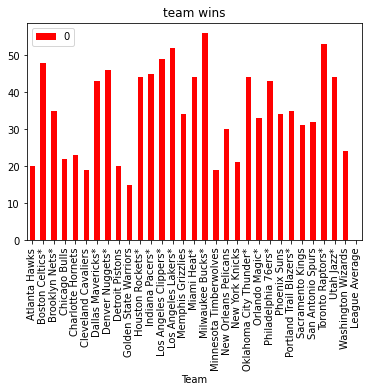

In [ ]:
# lets take a look at a simple bar plot of teams and wins 
# Create a sample dataframe with an text index
# A python dictionary
import matplotlib.pyplot as plot

index = teamdata.iloc[:,0]

#data = teamdata.iloc[:,-1:]

# Dictionary loaded into a DataFrame       

plot_df = pd.DataFrame(data=wins, index=index);

# Draw a vertical bar chart

plot_df.plot.bar(rot=90, color=['red'], title="team wins");

plot.show();

In [ ]:
# Now, lets run a regression model to find out the predictors of Wins for a team. 
# Lets treat League Average as just an average team in the NBA. 
# I would like to see how 3pt shooting and layups effect Wins. Basically, the Darryl Morrey Houston Rockets Model.
# I will look at percentage of shots by distance and percent made by distance of these shots. 
# then ill evaluate the accuracy of this model.

In [ ]:
from sklearn import linear_model
X = teamdata[['0-3 % (of FGA by Distance)', '3P (% of FGA by Distance)',
              '0-3 (FG% by Distance)', '3P (FG% by Distance)', '3P% (Corner)']]
y = teamdata['W']

In [ ]:
regr = linear_model.LinearRegression()
regr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#predict the Wins of an NBA team where the '0-3 % (of FGA by Distance)' is 0.616, '3P (% of FGA by Distance)' is 0.384,
#              '0-3 (FG% by Distance)' is 0.667, '3P (FG% by Distance)' is 0.358, '3P% (Corner)' is 0.39:
predictedW = regr.predict([[0.616, 0.384, 0.667, 0.358, 0.39]])

print(predictedW)
print(regr.coef_)

[81.29839393]
[141.2200316   16.42981603 296.87526276 421.26977524 -72.08265278]


In [ ]:
# the first value printed is the predicted wins a team would have for these values

# The result array represents the coefficient values of the predictors.

In [ ]:
regr.score(X,y)

0.41234487396674707

In [ ]:
# as we can see, only accounting for these few areas of basketball does not 
# have an accurate prediction of a teams success. 

# lets take a wild guess and try one more model to get a higher model score, hopefully above 0.90

In [ ]:
features = ['3P (% of FGA by Distance)', '3P (FG% by Distance)', '3P% (Corner)']
target = 'W'

X = teamdata[features].values.reshape(-1, len(features))
y = teamdata[target].values

ols = linear_model.LinearRegression()
model = ols.fit(X, y)

In [ ]:
model.score(X, y)

0.1941233900949897

In [ ]:
# no improvement. Lets add in some more data from a new data set to give us some more stats to use to predict wins. 

In [ ]:
url4 = "https://raw.githubusercontent.com/ian-gutierrez/ling572project/main/newadvancedteamdata.csv"
advancedteamdata = pd.read_csv(url4)
advancedteamdata.head(10)

,Rk,Team,Age,W,L,PW,PL,MOV,SOS,SRS,ORtg,DRtg,NRtg,Pace,FTr,3PAr,TS%,eFG%,TOV%,ORB%,FT/FGA,eFG%.1,TOV%.1,DRB%,FT/FGA.1,Arena,Attend.,Attend./G
0,1,Milwaukee Bucks*,29.2,56,17,57,16,10.08,-0.67,9.41,112.4,102.9,9.5,105.1,0.271,0.428,0.583,0.552,12.9,20.7,0.201,0.489,12.0,81.6,0.178,Fiserv Forum,549036,17711
1,2,Los Angeles Clippers*,27.4,49,23,50,22,6.44,0.21,6.66,113.9,107.6,6.3,101.5,0.295,0.375,0.577,0.535,12.6,23.5,0.233,0.506,12.2,77.6,0.206,STAPLES Center,610176,19068
2,3,Los Angeles Lakers*,29.5,52,19,48,23,5.79,0.49,6.28,112.0,106.3,5.7,100.9,0.276,0.358,0.573,0.542,13.3,24.5,0.201,0.515,14.1,78.8,0.205,STAPLES Center,588907,18997
3,4,Toronto Raptors*,26.6,53,19,50,22,6.24,-0.26,5.97,111.1,105.0,6.1,100.9,0.264,0.421,0.574,0.536,13.1,21.3,0.210,0.502,14.6,76.7,0.202,Scotiabank Arena,633456,19796
4,5,Boston Celtics*,25.3,48,24,50,22,6.31,-0.47,5.83,113.3,107.0,6.3,99.5,0.259,0.386,0.570,0.531,12.2,23.9,0.207,0.509,13.5,77.4,0.215,TD Garden,610864,19090
5,6,Dallas Mavericks*,26.1,43,32,49,26,4.95,-0.07,4.87,116.7,111.7,5.0,99.3,0.264,0.457,0.581,0.545,11.2,23.2,0.206,0.525,10.6,77.7,0.175,American Airlines Center,682096,20062
6,7,Houston Rockets*,29.2,44,28,42,30,2.96,0.17,3.13,112.9,110.1,2.8,103.7,0.288,0.501,0.578,0.537,12.6,21.0,0.228,0.529,13.7,75.6,0.197,Toyota Center,578458,18077
7,8,Miami Heat*,25.9,44,29,43,30,2.95,-0.35,2.59,112.5,109.5,3.0,98.3,0.299,0.419,0.587,0.547,13.5,20.3,0.234,0.523,12.6,79.5,0.213,AmericanAirlines Arena,629771,19680
8,9,Utah Jazz*,27.3,44,28,42,30,2.47,0.05,2.52,112.3,109.9,2.4,98.6,0.268,0.414,0.585,0.549,13.7,21.6,0.208,0.518,11.1,78.9,0.185,Vivint Smart Home Arena,567486,18306
9,10,Denver Nuggets*,25.6,46,27,41,32,2.11,0.24,2.35,113.1,111.0,2.1,97.1,0.235,0.344,0.567,0.535,12.3,24.8,0.183,0.533,12.9,76.8,0.198,Pepsi Center,633153,19186


In [ ]:
advancedteamdata.set_index("Team", inplace=True)
advancedteamdata["MOV"] = pd.to_numeric(advancedteamdata["MOV"])
advancedteamdata["NRtg"] = pd.to_numeric(advancedteamdata["NRtg"])
advancedteamdata["W"] = pd.to_numeric(advancedteamdata["W"])

advancedteamdata

,Rk,Age,W,L,PW,PL,MOV,SOS,SRS,ORtg,DRtg,NRtg,Pace,FTr,3PAr,TS%,eFG%,TOV%,ORB%,FT/FGA,eFG%.1,TOV%.1,DRB%,FT/FGA.1,Arena,Attend.,Attend./G
Team,,,,,,,,,,,,,,,,,,,,,,,,,,,
Milwaukee Bucks*,1,29.2,56,17,57,16,10.08,-0.67,9.41,112.4,102.9,9.5,105.1,0.271,0.428,0.583,0.552,12.9,20.7,0.201,0.489,12.0,81.6,0.178,Fiserv Forum,549036,17711
Los Angeles Clippers*,2,27.4,49,23,50,22,6.44,0.21,6.66,113.9,107.6,6.3,101.5,0.295,0.375,0.577,0.535,12.6,23.5,0.233,0.506,12.2,77.6,0.206,STAPLES Center,610176,19068
Los Angeles Lakers*,3,29.5,52,19,48,23,5.79,0.49,6.28,112.0,106.3,5.7,100.9,0.276,0.358,0.573,0.542,13.3,24.5,0.201,0.515,14.1,78.8,0.205,STAPLES Center,588907,18997
Toronto Raptors*,4,26.6,53,19,50,22,6.24,-0.26,5.97,111.1,105.0,6.1,100.9,0.264,0.421,0.574,0.536,13.1,21.3,0.210,0.502,14.6,76.7,0.202,Scotiabank Arena,633456,19796
Boston Celtics*,5,25.3,48,24,50,22,6.31,-0.47,5.83,113.3,107.0,6.3,99.5,0.259,0.386,0.570,0.531,12.2,23.9,0.207,0.509,13.5,77.4,0.215,TD Garden,610864,19090
Dallas Mavericks*,6,26.1,43,32,49,26,4.95,-0.07,4.87,116.7,111.7,5.0,99.3,0.264,0.457,0.581,0.545,11.2,23.2,0.206,0.525,10.6,77.7,0.175,American Airlines Center,682096,20062
Houston Rockets*,7,29.2,44,28,42,30,2.96,0.17,3.13,112.9,110.1,2.8,103.7,0.288,0.501,0.578,0.537,12.6,21.0,0.228,0.529,13.7,75.6,0.197,Toyota Center,578458,18077
Miami Heat*,8,25.9,44,29,43,30,2.95,-0.35,2.59,112.5,109.5,3.0,98.3,0.299,0.419,0.587,0.547,13.5,20.3,0.234,0.523,12.6,79.5,0.213,AmericanAirlines Arena,629771,19680
Utah Jazz*,9,27.3,44,28,42,30,2.47,0.05,2.52,112.3,109.9,2.4,98.6,0.268,0.414,0.585,0.549,13.7,21.6,0.208,0.518,11.1,78.9,0.185,Vivint Smart Home Arena,567486,18306


In [ ]:
advancedteamdata.dropna()
advancedteamdata.head(15)

,Rk,Age,W,L,PW,PL,MOV,SOS,SRS,ORtg,DRtg,NRtg,Pace,FTr,3PAr,TS%,eFG%,TOV%,ORB%,FT/FGA,eFG%.1,TOV%.1,DRB%,FT/FGA.1,Arena,Attend.,Attend./G
Team,,,,,,,,,,,,,,,,,,,,,,,,,,,
Milwaukee Bucks*,1,29.2,56,17,57,16,10.08,-0.67,9.41,112.4,102.9,9.5,105.1,0.271,0.428,0.583,0.552,12.9,20.7,0.201,0.489,12.0,81.6,0.178,Fiserv Forum,549036,17711
Los Angeles Clippers*,2,27.4,49,23,50,22,6.44,0.21,6.66,113.9,107.6,6.3,101.5,0.295,0.375,0.577,0.535,12.6,23.5,0.233,0.506,12.2,77.6,0.206,STAPLES Center,610176,19068
Los Angeles Lakers*,3,29.5,52,19,48,23,5.79,0.49,6.28,112.0,106.3,5.7,100.9,0.276,0.358,0.573,0.542,13.3,24.5,0.201,0.515,14.1,78.8,0.205,STAPLES Center,588907,18997
Toronto Raptors*,4,26.6,53,19,50,22,6.24,-0.26,5.97,111.1,105.0,6.1,100.9,0.264,0.421,0.574,0.536,13.1,21.3,0.210,0.502,14.6,76.7,0.202,Scotiabank Arena,633456,19796
Boston Celtics*,5,25.3,48,24,50,22,6.31,-0.47,5.83,113.3,107.0,6.3,99.5,0.259,0.386,0.570,0.531,12.2,23.9,0.207,0.509,13.5,77.4,0.215,TD Garden,610864,19090
Dallas Mavericks*,6,26.1,43,32,49,26,4.95,-0.07,4.87,116.7,111.7,5.0,99.3,0.264,0.457,0.581,0.545,11.2,23.2,0.206,0.525,10.6,77.7,0.175,American Airlines Center,682096,20062
Houston Rockets*,7,29.2,44,28,42,30,2.96,0.17,3.13,112.9,110.1,2.8,103.7,0.288,0.501,0.578,0.537,12.6,21.0,0.228,0.529,13.7,75.6,0.197,Toyota Center,578458,18077
Miami Heat*,8,25.9,44,29,43,30,2.95,-0.35,2.59,112.5,109.5,3.0,98.3,0.299,0.419,0.587,0.547,13.5,20.3,0.234,0.523,12.6,79.5,0.213,AmericanAirlines Arena,629771,19680
Utah Jazz*,9,27.3,44,28,42,30,2.47,0.05,2.52,112.3,109.9,2.4,98.6,0.268,0.414,0.585,0.549,13.7,21.6,0.208,0.518,11.1,78.9,0.185,Vivint Smart Home Arena,567486,18306


In [ ]:
# one hypothesis about the earlier failed regression model is that we did not account for defense at all
# this could be the reason our model only had about 50% accuracy. we only accounted for half the game. lets quickly
# run the model again, this time using defensive stats
# i feel that MOV and NRtg would be great indicators of a teams success. this is Margin of Victory and net rating. 

In [ ]:
import numpy as np

X2 = advancedteamdata[['MOV', 'NRtg']]
y2 = advancedteamdata['W']
regr2 = linear_model.LinearRegression()
regr2.fit(X2, y2)
predictedW2 = regr2.predict([[0,0]])

print(predictedW2)
print(regr2.coef_)
print(regr2.score(X2,y2))
print()

# compute r^2 with sklearn linear_model
print(regr2.score(X2, y2), 1 - (1-regr2.score(X2, y2))*(len(y2)-1)/(len(y2)-X2.shape[1]-1))

[35.7196615]
[0.517977   1.87390642]
0.9248967667845724

0.9248967667845724 0.9193335643241703


In [ ]:
# wow! we can see that based on a teams margin of victory and a teams net rating, we can predict a teams win total
# with 92% accuracy. 
# but, these stats we used to predict are pretty obvious. of course a team who on average has a positive MOV is going to win more games. 

# maybe im dragging this out too long, 
# but lets run a few more models, one with a simple linear regression
# and one with less obvious stats, to find out what is a good predictor of a teams success. 

In [ ]:
X3 = advancedteamdata[['DRtg']]
y3 = advancedteamdata['W']
regr3 = linear_model.LinearRegression()
regr3.fit(X3, y3)
#predictedW3 = regr3.predict([[12.8]])
#print(predictedW3)
print(regr3.coef_)
print(regr3.score(X3, y3))

[-3.16508839]
0.6712789312865706


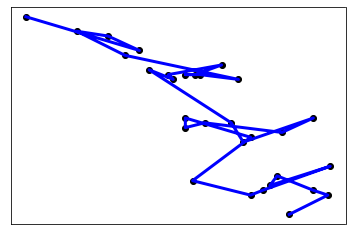

In [ ]:
plt.scatter(X3, y3,  color='black')
plt.plot(X3, y3, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [ ]:
# the next 2 cells below are modified code from a stackoverflow regression model which formats my statistical findings. 
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

X = advancedteamdata[['SOS', 'eFG%', 'TOV%']]
y = advancedteamdata['W']

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                            OLS Regression Results                            
Dep. Variable:                      W   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                     17.18
Date:                Thu, 11 Mar 2021   Prob (F-statistic):           2.35e-06
Time:                        04:23:20   Log-Likelihood:                -99.998
No. Observations:                  30   AIC:                             208.0
Df Residuals:                      26   BIC:                             213.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -250.6161     55.961     -4.478      0.0

In [ ]:
lm = LinearRegression()
lm.fit(X,y)
params = np.append(lm.intercept_,lm.coef_)
predictions = lm.predict(X)

newX = np.append(np.ones((len(X),1)), X, axis=1)
MSE = (sum((y-predictions)**2))/(len(newX)-len(newX[0]))

var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
sd_b = np.sqrt(var_b)
ts_b = params/ sd_b

p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-len(newX[0])))) for i in ts_b]

sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)

myDF3 = pd.DataFrame()
myDF3["Coefficients"],myDF3["Standard Errors"],myDF3["t values"],myDF3["Probabilities"] = [params,sd_b,ts_b,p_values]
print(myDF3)

   Coefficients  Standard Errors  t values  Probabilities
0     -250.6161           55.961    -4.478          0.000
1       -2.2753            3.094    -0.735          0.469
2      632.6396           95.852     6.600          0.000
3       -3.7679            1.606    -2.347          0.027


In [ ]:
# as we can see, this model is not great. The multicollinearity problem is an indicator of that to me. 
# but, the R-sq value does indicate that this does in fact play a part in predicting wins. 

# I am so excited with my findings here. using a teams strength of schedule, turnover percentage,
# and effective field goal percentage, we can somewhat predict the wins of a team. 

# from Minitab (a great programming tool which I like to use for regression), 
# In regression, "multicollinearity" refers to predictors that are correlated with other predictors.
# Multicollinearity occurs when your model includes multiple factors that are correlated not just to your
# response variable, but also to each other. In other words, it results when you have factors that are a bit redundant

# Lets try to find a model that uses unobvious stats which can predict wins without multicolinearity. 
# lets go back to the teamdata data set, and lets incorperate a model that includes more of the shooting splits. 

In [ ]:
salary = [102325554, 117111401, 157814503, 121989128, 126035037, 124083952, 126463122, 125885711, 132668175, 175042071, 142267551, 
          130246338, 141490310, 135459639, 128519246, 124604440, 140306680, 129527263, 104760419, 88745438, 89466731, 136544492, 
          150758474, 124614903, 128308277, 112113931, 133350146, 128481711, 131427094, 128562684,0]
teamdata["Salary"] = salary

In [ ]:
teamdata.head()

,Team,G,MP,FG%,Dist.,2P (% of FGA by Distance),0-3 % (of FGA by Distance),3-10ft (% of FGA by Distance),10-16ft (% of FGA by Distance),16-3pt (% of FGA by Distance),3P (% of FGA by Distance),2P (FG% by Distance),0-3 (FG% by Distance),3-10ft (FG% by Distance),10-16ft (FG% by Distance),16-3pt (FG% by Distance),3P (FG% by Distance),%Ast'd (2pt FG's),%FGA (Dunks),Md. (Dunks),%FGA (Dunks).1,Md. (Dunks).1,%Ast'd (3pt FG's),%3PA (Corner),3P% (Corner),Att. (Heaves),Md. (Heaves),W,Salary
Rk,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1.0,Atlanta Hawks,67,16280,0.449,14.1,0.602,0.291,0.155,0.097,0.059,0.398,0.525,0.658,0.414,0.394,0.376,0.333,0.525,0.086,448,0.268,829,0.743,0.201,0.342,13.0,1.0,20,102325554
2.0,Boston Celtics*,72,17430,0.461,13.9,0.614,0.276,0.173,0.094,0.071,0.386,0.522,0.662,0.387,0.437,0.416,0.364,0.491,0.053,302,0.307,1039,0.707,0.181,0.396,22.0,0.0,48,117111401
3.0,Brooklyn Nets*,72,17480,0.448,13.8,0.577,0.315,0.150,0.070,0.042,0.423,0.524,0.651,0.358,0.381,0.413,0.343,0.518,0.068,383,0.318,1061,0.789,0.213,0.369,13.0,0.0,35,157814503
4.0,Chicago Bulls,65,15675,0.447,13.3,0.604,0.340,0.152,0.057,0.055,0.396,0.511,0.627,0.362,0.375,0.354,0.348,0.487,0.072,372,0.305,900,0.812,0.225,0.383,13.0,0.0,22,121989128
5.0,Charlotte Hornets,65,15750,0.434,13.5,0.601,0.303,0.192,0.062,0.044,0.399,0.489,0.627,0.357,0.321,0.352,0.352,0.560,0.061,307,0.299,828,0.803,0.201,0.397,14.0,0.0,23,126035037


In [ ]:
# the next 2 cells below are modified code from a stackoverflow regression model which formats my statistical findings. 
#https://stackoverflow.com/questions/27928275/find-p-value-significance-in-scikit-learn-linearregression
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

X = teamdata[['FG%', 'Dist.','0-3 % (of FGA by Distance)', '3P (% of FGA by Distance)','0-3 (FG% by Distance)', '3-10ft (FG% by Distance)', '3P (FG% by Distance)' ]]
y = teamdata['W']

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      W   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                     3.217
Date:                Thu, 11 Mar 2021   Prob (F-statistic):             0.0158
Time:                        04:23:20   Log-Likelihood:                -113.22
No. Observations:                  31   AIC:                             242.4
Df Residuals:                      23   BIC:                             253.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [ ]:
lm = LinearRegression()
lm.fit(X,y)
params = np.append(lm.intercept_,lm.coef_)
predictions = lm.predict(X)

newX = np.append(np.ones((len(X),1)), X, axis=1)
MSE = (sum((y-predictions)**2))/(len(newX)-len(newX[0]))

var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
sd_b = np.sqrt(var_b)
ts_b = params/ sd_b

p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-len(newX[0])))) for i in ts_b]

sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)

myDF3 = pd.DataFrame()
myDF3["Coefficients"],myDF3["Standard Errors"],myDF3["t values"],myDF3["Probabilities"] = [params,sd_b,ts_b,p_values]
print(myDF3)

   Coefficients  Standard Errors  t values  Probabilities
0     -426.5492          164.785    -2.589          0.016
1      817.0614          505.873     1.615          0.120
2        5.0388            8.230     0.612          0.546
3       53.0785          205.111     0.259          0.798
4       46.3611          111.231     0.417          0.681
5       15.6225          187.877     0.083          0.934
6      -74.4530          154.689    -0.481          0.635
7        3.0838          274.268     0.011          0.991


In [ ]:
# from this model, we can see that only predictor 0 is statistically significant in predicting team wins. 
# this model is not a good model for predicting team wins. 

In [ ]:
"""
to conlude this project, i would like to summarize my findings. 
a teams strength of schedule, effective field goal percentage, and turnover percentage
are good predictors of how a team will succeed in the 2020 season. 

although there are independence/dependence problems, multicollinearity problems, 
these measures are still significant in determing team success. 

what we need to remember when looking at this data is that this season was like 
no other. whether this is reflected in causing discrepencies or innacurate data 
has not been determined as this would require further analysis of other seasons. 

we can see that through the analysis and model of including shot selection that 
while these measures did not signifiy accurate predition of wins, there still 
may be a deeper explanation. maybe, there is no 'perfect' way to play basektball. 
each team is different, and can win in different ways. 
"""

"\nto conlude this project, i would like to summarize my findings. \na teams strength of schedule, effective field goal percentage, and turnover percentage\nare good predictors of how a team will succeed in the 2020 season. \n\nalthough there are independence/dependence problems, multicollinearity problems, \nthese measures are still significant in determing team success. \n\nwhat we need to remember when looking at this data is that this season was like \nno other. whether this is reflected in causing discrepencies or innacurate data \nhas not been determined as this would require further analysis of other seasons. \n\nwe can see that through the analysis and model of including shot selection that \nwhile these measures did not signifiy accurate predition of wins, there still \nmay be a deeper explanation. maybe, there is no 'perfect' way to play basektball. \neach team is different, and can win in different ways. \n"

In [ ]:
# across my research for this project, i came across another similar study coming from 
# https://towardsdatascience.com/a-metallurgical-scientists-approach-to-predicting-nba-team-success-4bfa7b2bd6a7
# the authors closing remarks summarize exactly how i feel about this study. 
""""
# Because the regression model in this study is built upon the fundamental 
# concept of team composition determining success, it can potentially be 
# employed as a guiding tool for building successful NBA teams. Assuming a 
# player’s performance statistics and characteristic shot charts are translatable
# from one team to another, the model can provide a pretty decent quantitative 
# estimate of a potential acquisition’s direct impact on a team’s chance of winning. 
# To my knowledge, and I could be wrong, team restructuring decisions by general management 
# across the league are still mostly rooted in human intuition and conventional wisdom. 
# I’m not suggesting that scouts and human intuition should be replaced with computational models, 
# but I personally feel that the roster building efforts in the NBA can definitely 
# benefit from being more data-driven than it currently is.
"""

'"\n# Because the regression model in this study is built upon the fundamental \n# concept of team composition determining success, it can potentially be \n# employed as a guiding tool for building successful NBA teams. Assuming a \n# player’s performance statistics and characteristic shot charts are translatable\n# from one team to another, the model can provide a pretty decent quantitative \n# estimate of a potential acquisition’s direct impact on a team’s chance of winning. \n# To my knowledge, and I could be wrong, team restructuring decisions by general management \n# across the league are still mostly rooted in human intuition and conventional wisdom. \n# I’m not suggesting that scouts and human intuition should be replaced with computational models, \n# but I personally feel that the roster building efforts in the NBA can definitely \n# benefit from being more data-driven than it currently is.\n'

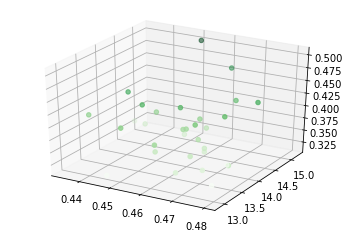

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


##create some test data and simulate results
x_data = [['FG%', 'Dist.', '3P (% of FGA by Distance)']]
noise = np.random.randn(1,2000)*0.1
y_data = teamdata[['W']]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x1 = teamdata[['FG%']]
x2 = teamdata[['Dist.']]
x3 = teamdata[['3P (% of FGA by Distance)']]
ax.scatter3D(x1, x2, x3, c=x3, cmap='Greens');

plt.show()

#actual implementation of liner regression
#compute y_pred, compare with y_data above etc etc
#assume more code here

#exit() 